<a href="https://colab.research.google.com/github/Jlokkerbol/masterclass/blob/main/Bayesian_Network_Example.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Introduction to Bayesian Networks using BNLEARN
For documentation on the module, please visit https://erdogant.github.io/bnlearn/pages/html/index.html


In [79]:
!pip install -U matplotlib
import matplotlib
!pip install bnlearn
import bnlearn

# Workflow of Building and Querying a Bayesian Network

This notebook is concerned with demonstrating the workflow of how to build and query a Bayesian Network, which consists of three phases:
1. building the structure of the network
2. determining the parameters (conditional probabilities) of the network 
3. doing inference, determining the probabilities for node outcomes, given evidence on other nodes

## The Asia Network

Before going through each of these phases, we start with importing a dataset, where we make use of the Asia Network, as described in [Lauritzen and Spiegelhalter (1988)](https://rss.onlinelibrary.wiley.com/doi/pdf/10.1111/j.2517-6161.1988.tb01721.x).

In [80]:
# Load example dataset with 10.000 samples
df = bnlearn.import_example('asia', n=10000)
df

[bnlearn] >Extracting files..


  0%|          | 0/8 [00:00<?, ?it/s]

,asia,tub,smoke,lung,bronc,either,xray,dysp
0,1,1,1,1,0,1,1,0
1,1,1,0,1,1,1,1,1
2,1,1,0,1,0,1,1,0
3,1,1,1,1,1,1,1,1
4,1,1,0,1,1,1,1,1
...,...,...,...,...,...,...,...,...
9995,1,1,0,0,1,0,0,0
9996,1,1,1,1,1,1,1,1
9997,1,1,0,1,0,1,1,1
9998,1,1,0,0,1,0,0,0


The Asia dataset is often used as an example in the context of Bayesian Networks. It supports decision making under uncertainty, by modeling the risk that a patient has lung cancer or tuberculosis, given potential information about smoking, having visited Asia, X-ray results, having shortness of breath (dyspnea), etc.

For an article describing the application of a Bayesian Network in this context, please refer to: https://www.valueinhealthjournal.com/article/S1098-3015(19)30057-9/pdf

In [81]:
# high level exploring of the data
df.describe()

,asia,tub,smoke,lung,bronc,either,xray,dysp
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,0.989500,0.990600,0.503300,0.948200,0.547900,0.939400,0.894900,0.566100
std,0.101935,0.096502,0.500014,0.221634,0.497725,0.238607,0.306698,0.495636
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,1.000000,0.000000,1.000000,0.000000,1.000000,1.000000,0.000000
50%,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
75%,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


This shows that the data has been preprocessed, containing no missing values, and where each of the features is dummy-encoded. 

## Part I: constructing a Directed Acyclic Graph (DAG)

A DAG can be constructed using expert knowledge, or it can be learned from your data. Constructing a DAG based on expert knowledge requires you to manually define each of the edges. Learning a DAG from data requires (obviously) data for each of the potential nodes, and makes use of bnlearn's built-in functionality to learn the structure in the data (using an algorithm to search along different structures, and a scoring metric for comparing different structures). It is also possible to construct a DAG in a hybrid manner, by learning it from the data under constraints provided by a domain expert.

### 'Manually' constructing a DAG
Defining your own DAG, using expert knowledge, simply comes down to defining all of the arrows (edges) of the DAG, indicating which variables (nodes) impact on which other variables (nodes)

[bnlearn] >Bayesian DAG created.
[bnlearn]> Set node properties.
[bnlearn] >Plot based on BayesianModel


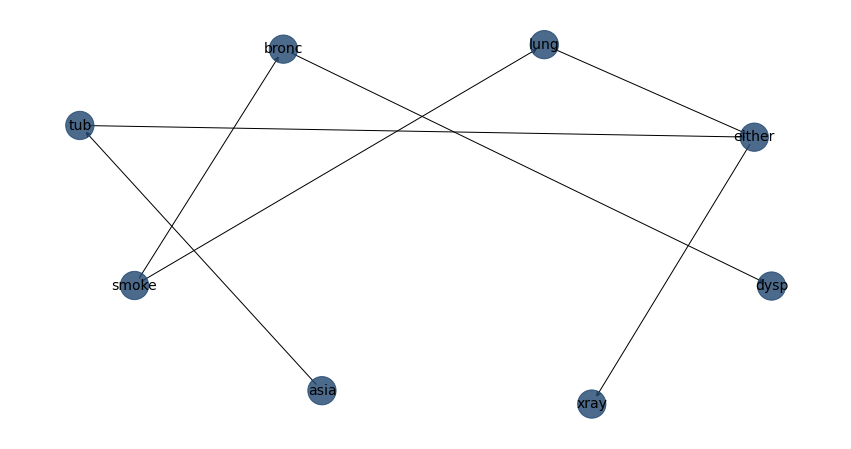

In [82]:
# Define the network structure
edges = [('smoke', 'lung'),
         ('smoke', 'bronc'),
         ('asia', 'tub'),
         ('lung', 'either'),
         ('bronc', 'dysp'),
         ('either', 'xray'),
         ('tub', 'either')]

# Make the actual Bayesian DAG
Expert_DAG = bnlearn.make_DAG(edges)

# Plot the DAG
G = bnlearn.plot(Expert_DAG)

In [83]:
Expert_DAG['adjmat']

target,smoke,lung,bronc,asia,tub,either,dysp,xray
source,,,,,,,,
smoke,False,True,True,False,False,False,False,False
lung,False,False,False,False,False,True,False,False
bronc,False,False,False,False,False,False,True,False
asia,False,False,False,False,True,False,False,False
tub,False,False,False,False,False,True,False,False
either,False,False,False,False,False,False,False,True
dysp,False,False,False,False,False,False,False,False
xray,False,False,False,False,False,False,False,False


In [84]:
#Converting adjacency matrix into vector
vector = bnlearn.adjmat2vec(Expert_DAG['adjmat'], min_weight=1)
vector

,source,target,weight
0,smoke,lung,True
1,smoke,bronc,True
2,lung,either,True
3,bronc,dysp,True
4,asia,tub,True
5,tub,either,True
6,either,xray,True


### Building the DAG from data
A DAG can also be constructed by learning it from the data, using bnlearn's structure_learning.fit().

In [85]:
# Structure learning on the data set
learned_model = bnlearn.structure_learning.fit(df)

[bnlearn] >Computing best DAG using [hc]
[bnlearn] >Set scoring type at [bic]


[bnlearn]> Set node properties.
[bnlearn] >Plot based on BayesianModel


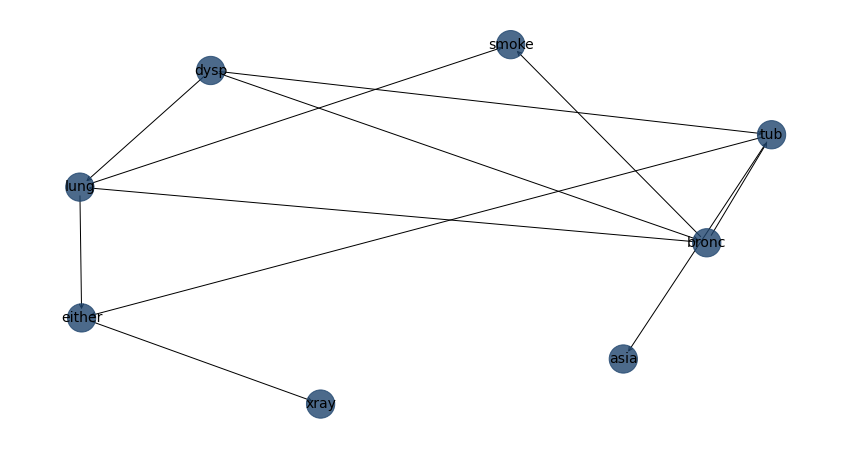

{'G': <networkx.classes.digraph.DiGraph at 0x7f82b9381810>,
 'node_properties': {'asia': {'node_color': '#1f456e', 'node_size': 800},
  'bronc': {'node_color': '#1f456e', 'node_size': 800},
  'dysp': {'node_color': '#1f456e', 'node_size': 800},
  'either': {'node_color': '#1f456e', 'node_size': 800},
  'lung': {'node_color': '#1f456e', 'node_size': 800},
  'smoke': {'node_color': '#1f456e', 'node_size': 800},
  'tub': {'node_color': '#1f456e', 'node_size': 800},
  'xray': {'node_color': '#1f456e', 'node_size': 800}},
 'pos': {'asia': array([ 0.56916584, -0.75502577]),
  'bronc': array([ 0.79502689, -0.12330881]),
  'dysp': array([-0.54827111,  0.81314609]),
  'either': array([-0.89756572, -0.53167955]),
  'lung': array([-0.90250538,  0.17930026]),
  'smoke': array([0.26411426, 0.95361545]),
  'tub': array([0.97057913, 0.46395233]),
  'xray': array([-0.25054392, -1.        ])}}

In [86]:
# Plot the DAG
bnlearn.plot(learned_model)

[bnlearn]> Set node properties.
[bnlearn] >Plot based on BayesianModel
[bnlearn] >Existing coordinates from <pos> are used.


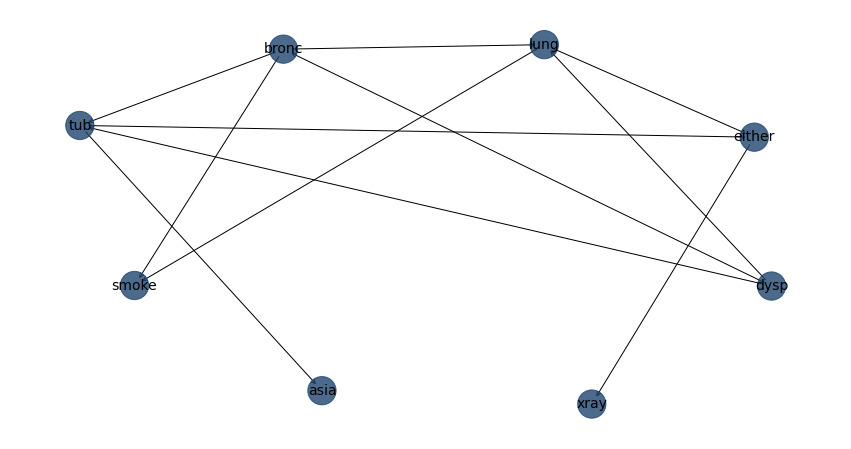

{'G': <networkx.classes.digraph.DiGraph at 0x7f82b9304e90>,
 'node_properties': {'asia': {'node_color': '#1f456e', 'node_size': 800},
  'bronc': {'node_color': '#1f456e', 'node_size': 800},
  'dysp': {'node_color': '#1f456e', 'node_size': 800},
  'either': {'node_color': '#1f456e', 'node_size': 800},
  'lung': {'node_color': '#1f456e', 'node_size': 800},
  'smoke': {'node_color': '#1f456e', 'node_size': 800},
  'tub': {'node_color': '#1f456e', 'node_size': 800},
  'xray': {'node_color': '#1f456e', 'node_size': 800}},
 'pos': {'asia': array([-0.31870088, -0.91228946]),
  'bronc': array([-0.4271231 ,  0.86459746]),
  'dysp': array([ 0.94651213, -0.36783167]),
  'either': array([0.8978596 , 0.40664048]),
  'lung': array([0.30694598, 0.88798031]),
  'smoke': array([-0.84611058, -0.36492542]),
  'tub': array([-1.        ,  0.46763929]),
  'xray': array([ 0.44061686, -0.98181098])}}

In [87]:
# enforcing the same positioning as the one in bnlearn.plot G
bnlearn.plot(learned_model, pos=G['pos'])

In [88]:
learned_model['adjmat']

target,asia,tub,smoke,lung,bronc,either,xray,dysp
source,,,,,,,,
asia,False,False,False,False,False,False,False,False
tub,True,False,False,False,False,True,False,False
smoke,False,False,False,False,False,False,False,False
lung,False,False,True,False,False,True,False,False
bronc,False,True,True,True,False,False,False,False
either,False,False,False,False,False,False,True,False
xray,False,False,False,False,False,False,False,False
dysp,False,True,False,True,True,False,False,False


## Taking a hybrid approach to building the structure

By adding constraints (e.g. forcing certain nodes to be in the model), you can enter domain knowledge in the process of learning the structure.

In [89]:
# Structure learning on the data set under (domain expert) constraints
hybrid_model = bnlearn.structure_learning.fit(df, methodtype='hc', bw_list_method='nodes', black_list=['asia','tub','bronc','dysp'])

[bnlearn] >Computing best DAG using [hc]
[bnlearn] >Filter variables (nodes) on black_list..
[bnlearn] >Number of features after white/black listing: 4
[bnlearn] >Set scoring type at [bic]


In [90]:
hybrid_model['adjmat']

target,smoke,lung,either,xray
source,,,,
smoke,False,True,False,False
lung,False,False,True,False
either,False,False,False,True
xray,False,False,False,False


[bnlearn]> Set node properties.
[bnlearn] >Plot based on BayesianModel


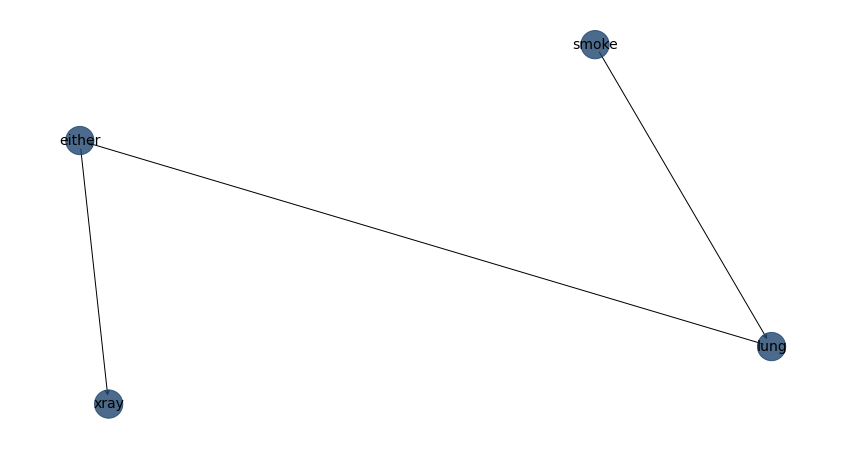

{'G': <networkx.classes.digraph.DiGraph at 0x7f82b920a950>,
 'node_properties': {'either': {'node_color': '#1f456e', 'node_size': 800},
  'lung': {'node_color': '#1f456e', 'node_size': 800},
  'smoke': {'node_color': '#1f456e', 'node_size': 800},
  'xray': {'node_color': '#1f456e', 'node_size': 800}},
 'pos': {'either': array([-0.79696238,  0.49345598]),
  'lung': array([ 0.98749095, -0.59486257]),
  'smoke': array([0.53211708, 1.        ]),
  'xray': array([-0.72264564, -0.89859341])}}

In [92]:
bnlearn.plot(hybrid_model)

### Assessing structures
When structures have been built, they can be assessed by comparing multiple DAGs, or assessing their topological order.

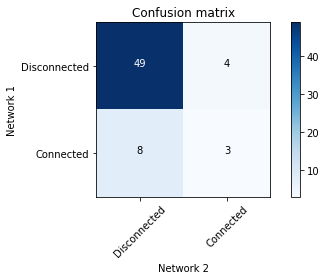

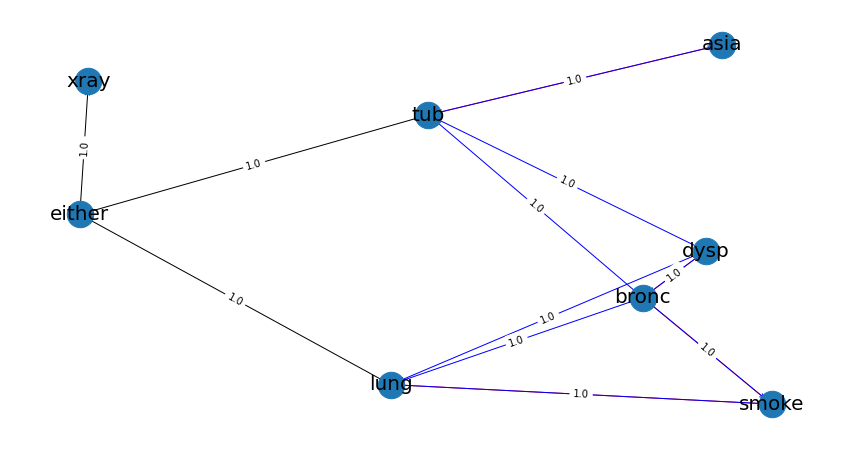

(array([[49,  4],
        [ 8,  3]]), target  asia  tub  smoke  lung  bronc  either  xray  dysp
 source                                                   
 asia       0    2      0     0      0       0     0     0
 tub       -1    0      0     0      0       1     0     0
 smoke      0    0      0     2      2       0     0     0
 lung       0    0     -1     0      0       1     0     0
 bronc      0   -1     -1    -1      0       0     0     2
 either     0    0      0     0      0       0     1     0
 xray       0    0      0     0      0       0     0     0
 dysp       0   -1      0    -1     -1       0     0     0)

In [93]:
# Plot differences between expert-DAG and the computed-DAG
bnlearn.compare_networks(learned_model, Expert_DAG)

In [97]:
# Assessing the topological ordering of the entire graph, 
# providing the order such that a child is always on the right of its parents
bnlearn.topological_sort(Expert_DAG)

['smoke', 'lung', 'bronc', 'asia', 'tub', 'either', 'dysp', 'xray']

In [98]:
bnlearn.topological_sort(learned_model)

['dysp', 'bronc', 'tub', 'asia', 'lung', 'smoke', 'either', 'xray']

In [99]:
bnlearn.topological_sort(Expert_DAG, 'asia') #starting at asia

['asia', 'tub', 'either', 'xray']

## Part II: Constructing conditional probability tables

After constructing the DAG, the next step in constructing a Bayesian Network is about determining the conditional probabilities. Just like with constructing the DAGs, these can be user-defined (based on expert knowledge / external evidence), or learned from the data.

### Defining your own conditional probabilities

In [100]:
from pgmpy.factors.discrete import TabularCPD

# constructing probabilities for 'asia'
cpt_asia = TabularCPD(variable='asia', variable_card=2, values=[[0.3], [0.7]])
print(cpt_asia)

+---------+-----+
| asia(0) | 0.3 |
+---------+-----+
| asia(1) | 0.7 |
+---------+-----+


In [101]:
cpt_smoke = TabularCPD(variable='smoke', variable_card=2,
                       values=[[0.5], [0.5]])
cpt_tub = TabularCPD(variable='tub', variable_card=2, values=[
                     [0.08, 0.03], [0.92, 0.97]], evidence=['asia'], evidence_card=[2])
cpt_lung = TabularCPD(variable='lung', variable_card=2, values=[
                      [0.15, 0.05], [0.85, 0.95]], evidence=['smoke'], evidence_card=[2])
cpt_either = TabularCPD(variable='either', variable_card=2, values=[[0.5,  0.8,  0.6, 0.1], [
                        0.5, 0.2,  0.4, 0.9]], evidence=['tub', 'lung'], evidence_card=[2, 2])
cpt_bronc = TabularCPD(variable='bronc', variable_card=2, values=[
                       [0.65, 0.35], [0.35, 0.65]], evidence=['smoke'], evidence_card=[2])
cpt_xray = TabularCPD(variable='xray', variable_card=2, values=[[0.97, 0.04], [
                      0.03, 0.96]], evidence=['either'], evidence_card=[2])
cpt_dysp = TabularCPD(variable='dysp', variable_card=2, values=[[0.7, 0.5], [
                      0.3, 0.5]], evidence=['bronc'], evidence_card=[2])

In [102]:
#Now need to connect the DAG with CPDs
Expert_DAG = bnlearn.make_DAG(Expert_DAG, CPD=[cpt_asia, cpt_smoke, cpt_tub, cpt_lung, cpt_either, cpt_bronc, cpt_xray, cpt_dysp])

[bnlearn] >No changes made to existing Bayesian DAG.
[bnlearn] >Add CPD: asia
[bnlearn] >Add CPD: smoke
[bnlearn] >Add CPD: tub
[bnlearn] >Add CPD: lung
[bnlearn] >Add CPD: either
[bnlearn] >Add CPD: bronc
[bnlearn] >Add CPD: xray
[bnlearn] >Add CPD: dysp
[bnlearn] >Checking CPDs..
[bnlearn] >Check for DAG structure. Correct: True


In [103]:
bnlearn.print_CPD(Expert_DAG)

CPD of asia:
+---------+-----+
| asia(0) | 0.3 |
+---------+-----+
| asia(1) | 0.7 |
+---------+-----+
CPD of smoke:
+----------+-----+
| smoke(0) | 0.5 |
+----------+-----+
| smoke(1) | 0.5 |
+----------+-----+
CPD of tub:
+--------+---------+---------+
| asia   | asia(0) | asia(1) |
+--------+---------+---------+
| tub(0) | 0.08    | 0.03    |
+--------+---------+---------+
| tub(1) | 0.92    | 0.97    |
+--------+---------+---------+
CPD of lung:
+---------+----------+----------+
| smoke   | smoke(0) | smoke(1) |
+---------+----------+----------+
| lung(0) | 0.15     | 0.05     |
+---------+----------+----------+
| lung(1) | 0.85     | 0.95     |
+---------+----------+----------+
CPD of either:
+-----------+---------+---------+---------+---------+
| tub       | tub(0)  | tub(0)  | tub(1)  | tub(1)  |
+-----------+---------+---------+---------+---------+
| lung      | lung(0) | lung(1) | lung(0) | lung(1) |
+-----------+---------+---------+---------+---------+
| either(0) | 0.5     |

### Learning the conditional probabilities based on the data

In [104]:
# Parameter learning on the user-defined DAG and input data
learned_model = bnlearn.parameter_learning.fit(learned_model, df)

[bnlearn] >Parameter learning> Computing parameters using [bayes]
[bnlearn] >Conversion of adjmat to BayesianModel.
[bnlearn] >CPD of tub:
+--------+---------------------+-----+----------------------+
| bronc  | bronc(0)            | ... | bronc(1)             |
+--------+---------------------+-----+----------------------+
| dysp   | dysp(0)             | ... | dysp(1)              |
+--------+---------------------+-----+----------------------+
| tub(0) | 0.04198668714797747 | ... | 0.028141101862861673 |
+--------+---------------------+-----+----------------------+
| tub(1) | 0.9580133128520225  | ... | 0.9718588981371383   |
+--------+---------------------+-----+----------------------+
[bnlearn] >CPD of asia:
+---------+---------------------+---------------------+
| tub     | tub(0)              | tub(1)              |
+---------+---------------------+---------------------+
| asia(0) | 0.43265993265993263 | 0.03344224485873534 |
+---------+---------------------+---------------------+

## Part III: Inference

Now that we have constructed/learned the DAG and the conditional probabilities, we can use the Bayesian Network for inference, by simply querying the Network.

In [105]:
# we make inference by specifying the variables we are interested in, and the available/observed evidence
q1_l = bnlearn.inference.fit(learned_model, variables=['lung'], evidence={'smoke':1})

[bnlearn] >Variable Elimination..


  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

+---------+-------------+
| lung    |   phi(lung) |
+=========+=============+
| lung(0) |      0.0530 |
+---------+-------------+
| lung(1) |      0.9470 |
+---------+-------------+


In [106]:
# which works equally well for our own constructed Network
q1_E = bnlearn.inference.fit(Expert_DAG, variables=['lung'], evidence={'smoke':1})

[bnlearn] >Variable Elimination..


0it [00:00, ?it/s]

0it [00:00, ?it/s]

+---------+-------------+
| lung    |   phi(lung) |
+=========+=============+
| lung(0) |      0.0500 |
+---------+-------------+
| lung(1) |      0.9500 |
+---------+-------------+


In [107]:
# but also the other way around
q2_l = bnlearn.inference.fit(learned_model, variables=['smoke'], evidence={'lung':0})

[bnlearn] >Variable Elimination..


  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

+----------+--------------+
| smoke    |   phi(smoke) |
+==========+==============+
| smoke(0) |       0.7122 |
+----------+--------------+
| smoke(1) |       0.2878 |
+----------+--------------+


In [108]:
# or on multiple variables, with multiple evidence nodes
q3_l = bnlearn.inference.fit(learned_model, variables=['bronc','lung'], evidence={'smoke':1, 'xray':0})

[bnlearn] >Variable Elimination..


  0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

+---------+----------+-------------------+
| lung    | bronc    |   phi(lung,bronc) |
+=========+==========+===================+
| lung(0) | bronc(0) |            0.1213 |
+---------+----------+-------------------+
| lung(0) | bronc(1) |            0.1376 |
+---------+----------+-------------------+
| lung(1) | bronc(0) |            0.2391 |
+---------+----------+-------------------+
| lung(1) | bronc(1) |            0.5019 |
+---------+----------+-------------------+


The network can also return the most likely values for a user-defined set of nodes, for each instance in a dataset, using bnlearn.predict() 

In [109]:
# The states with highest probability are returned
Prob_E = bnlearn.predict(Expert_DAG, df, variables=['bronc','xray'])
Prob_E

[bnlearn]> Remaining columns for inference: 6






  0%|          | 0/23 [00:00<?, ?it/s]



 26%|██▌       | 6/23 [00:00<00:00, 56.59it/s]



 52%|█████▏    | 12/23 [00:00<00:00, 55.78it/s]



100%|██████████| 23/23 [00:00<00:00, 55.59it/s]


,xray,bronc,p
0,1,1,0.547368
1,1,0,0.505946
2,1,0,0.693333
3,1,1,0.725581
4,1,0,0.505946
...,...,...,...
9995,0,0,0.700556
9996,1,1,0.725581
9997,1,0,0.505946
9998,0,0,0.700556


In [110]:
# The states with highest probability are returned
Prob_l = bnlearn.predict(learned_model, df.drop('asia', axis=1), variables=['bronc','xray'])
Prob_l

[bnlearn]> Remaining columns for inference: 5






  0%|          | 0/15 [00:00<?, ?it/s]



 27%|██▋       | 4/15 [00:00<00:00, 39.12it/s]



 60%|██████    | 9/15 [00:00<00:00, 41.99it/s]



100%|██████████| 15/15 [00:00<00:00, 40.92it/s]


,bronc,xray,p
0,0,1,0.718789
1,1,1,0.697912
2,0,1,0.852934
3,1,1,0.843805
4,1,1,0.697912
...,...,...,...
9995,0,0,0.506115
9996,1,1,0.843805
9997,1,1,0.697912
9998,0,0,0.506115


# Conclusion

This notebook showed you how to apply the workflow of building the structure, determining the parameters, and doing inference on the Network. More examples (e.g. using the Titanic dataset) can be found in the [bnlearn documentation](https://erdogant.github.io/bnlearn/pages/html/index.html). 